<a href="https://colab.research.google.com/github/bhonsleaditya1/Lending-Club-PySpark/blob/master/Lending_Club_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install findspark

--2020-06-22 07:42:52--  https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 2a01:4f8:10a:201a::2
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220272364 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.0-bin-hadoop2.7.tgz’

spark-3.0.0-bin-had 100%[===================>] 210.07M  25.0MB/s    in 9.1s    

2020-06-22 07:43:02 (23.1 MB/s) - ‘spark-3.0.0-bin-hadoop2.7.tgz’ saved [220272364/220272364]



In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import pyspark.sql.functions as f
from tqdm import tqdm
from pyspark.sql.types import IntegerType,DateType,DoubleType,StringType
from pyspark.ml.feature import QuantileDiscretizer
from pyspark.sql.functions import log,unix_timestamp, from_unixtime,lit
from pyspark.sql import Window 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%time dataset = spark.read.csv('/content/drive/My Drive/Lending-Club/loan.csv',inferSchema=True, header =True)
df = dataset
df = df.filter((df.loan_status != 'Current')&(df.loan_status != 'Does not meet the credit policy. Status:Charged Off')&(df.loan_status != 'Does not meet the credit policy. Status:Fully Paid'))

CPU times: user 10.6 ms, sys: 1.86 ms, total: 12.5 ms
Wall time: 47.4 s


In [ ]:
import pyspark.sql.functions as f
df.cache()
x=25
df = df.withColumn('amnt_left_per', (f.col('total_rec_prncp')/(f.col('funded_amnt')))*100)
df = df.withColumn('target',f.when(f.col('loan_status')=='Fully Paid',0).otherwise(f.when(f.col('amnt_left_per')>x,2).otherwise(1)))

In [ ]:
%time newdf = spark.read.csv('/content/drive/My Drive/Lending-Club/loanFinal.csv',inferSchema=True, header =True)
newdf = newdf.cache()

CPU times: user 11.4 ms, sys: 1.18 ms, total: 12.5 ms
Wall time: 46.5 s


In [ ]:
from tqdm import tqdm 
stats = {}
for col in tqdm(newdf.columns):
  stats[col] = newdf.select(col).summary()

100%|██████████| 142/142 [08:32<00:00,  3.61s/it]


In [ ]:
for col in pastdf.columns:
  if str()

142

In [ ]:
p = pd.DataFrame(index=None,columns=[])
norows = newdf.count()
for col in stats:
  pdf = stats[col].toPandas()
  pdf_T = pdf.T
  pdf_T.columns = pdf_T.iloc[0]
  pdf_T = pdf_T[1:]
  p=p.append(pdf_T)
p['fill%'] = (p['count'].astype(int)/norows)*100
#p['type'] = [f.dataType for f in pastdf.schema.fields]
p.to_excel("CleanDataStatistics.xlsx")

In [ ]:
ty={}
ty['issue_d'] = 'MMM-yyyy'
ty['last_pymnt_d'] = 'MMM-yyyy'

In [ ]:
df.select('last_pymnt_d',f.to_timestamp('last_pymnt_d', 'MMM-yyyy').alias('date')).show()

+------------+-------------------+
|last_pymnt_d|               date|
+------------+-------------------+
|    Jan-2019|2019-01-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
|    Feb-2019|2019-02-01 00:00:00|
|    Jan-2019|2019-01-01 00:00:00|
+------------+-------------------+
only showing top 20 rows



In [ ]:
for col in pastdf.columns:
  if str(typ[col])=='DateType':
    pastdf.select(col).show(5)

In [ ]:
from pyspark.sql.types import IntegerType,DateType,DoubleType,StringType
from pyspark.sql import functions as f
import pandas as pd
import re

pastdf = df.cache()

schema = pd.read_csv('/content/drive/My Drive/Lending-Club/schema.csv').values.tolist()
schema = dict(schema)
#remove = pd.read_csv('/content/drive/My Drive/Lending-Club/RemoveRowsCount.csv',header=None).values.tolist()
#remove = [i[0] for i in remove]
removerows = ['id','member_id','url','desc','zip_code','addr_state']
#removerows.extend(remove)
df = df.drop(*removerows)
from pyspark.sql.functions import monotonically_increasing_id
df = df.withColumn("id", monotonically_increasing_id())

columns = df.columns
norows = df.count()
types = [f.dataType for f in df.schema.fields]
typ = {columns[i]: types[i] for i in range(len(types))}
strcolm = []
columns = df.columns
for col in columns:
  if str(typ[col]) == 'StringType':
    strcolm.append(col)
 
for col in schema:
  if col in strcolm:
    if schema[col]== 'date':
      df = df.withColumn(col, f.to_timestamp(df[col], 'MMM-yyyy'))
      #df = df.fillna({col: 0})
    elif schema[col]== 'int':
      df = df.withColumn(col, df[col].cast(IntegerType()))
      #df = df.fillna({col: 0})
    elif schema[col] == 'double':
      df = df.withColumn(col, df[col].cast(DoubleType()))
      #df = df.fillna({col: 0})
    #else:
      #df = df.fillna({col: ''})

zip= {}
value = {}
zip['home_ownership']=['2 years']
zip['verification_status'] =['38000']
zip['emp_length'] = [' reactors"']
zip['home_ownership'] = ['2 years']

for i in zip:
  for j in zip[i]:
    df = df.withColumn(i, f.when(df[i] == j,'').otherwise(df[i]))
for i in value:
  for j in value[i]:
    df = df.withColumn(i, f.when(df[i] == j,df[i]).otherwise(''))
pastdf = df

In [ ]:
pastdf = df.cache()

In [ ]:
pastdf.coalesce(1).write.csv('loanF',header=True)

In [ ]:
cat /content/loanF/part-00000-2a990666-dc03-4031-b236-8a285973e48d-c000.csv > loanFinal.csv 

In [ ]:
%time dataset = spark.read.csv('/content/drive/My Drive/Lending-Club/loanFinal.csv',inferSchema=True, header =True)
df = dataset
pastdf = df.cache()

CPU times: user 6.56 ms, sys: 262 µs, total: 6.82 ms
Wall time: 25.9 s


In [ ]:
newdf = spark.read.csv('/content/drive/My Drive/Lending-Club/loanFinal.csv',inferSchema=True, header=True)
remove = pd.read_csv('/content/drive/My Drive/Lending-Club/RemoveRowsCount.csv',header=None)[0].to_list()
foriv = newdf.drop(*remove).cache()
foriv = foriv.sample(False,0.015,234)

In [ ]:
foriv.select('term').dtypes

[('term', 'string')]

In [ ]:
import pandas as pd
import numpy as np
 
cross = {}
columns = foriv.columns
types = [f.dataType for f in foriv.schema.fields]
typ = {columns[i]: types[i] for i in range(len(types))}
columns.remove('target')
for col in columns:
  if str(typ[col]) in ['StringType','DateType']:
    foriv.drop(col)
l = len(columns)
print(l)
dt=pd.DataFrame(np.triu(np.ones((l,l))).astype(np.bool),index=columns,columns=columns)
for col in foriv.columns:
  cross[col] = dt.index[dt[col]==False].tolist()
  cross[col].append(col)
  print(cross[col])

93
['int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_rev_tl', 'num_bc_sats', 'num_il

KeyError: ignored

In [ ]:
cross={}
for col in columns:
  if str(typ[col]) in ['StringType','DateType']:
    columns.remove(col)
l = len(columns)
print(l)
dt=pd.DataFrame(np.triu(np.ones((l,l))).astype(np.bool),index=columns,columns=columns)
for col in dt.columns:
  cross[col] = dt.index[dt[col]==False].tolist()
  cross[col].append(col)
  print(cross[col])

83
['installment', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_rev_tl', 'num_bc_sats', 'num_il_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m

In [ ]:
print(columns)

['installment', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_rev_tl', 'num_bc_sats', 'num_il_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from tqdm import tqdm
  
def mutualInfo(df,target):
  cols = df.columns
  mi={}
  error={}
  cols.remove(target)
  for col in tqdm(cols):
    tdf = np.array(df.select(col,target).collect()).astype('float')
    tdf = tdf[~np.isnan(tdf).any(axis=1)]
    mut = adjusted_mutual_info_score(tdf[:,0],tdf[:,1])
    mi[col] = mut
  #pdf.to_csv('mi.csv', mode='a')
  return mi

In [ ]:
chunks = [pastdf.columns[x:x+15] for x in range(0, len(pastdf.columns), 15)]

In [ ]:
mi={}

In [ ]:
fori = foriv.toPandas()[columns]
cols = columns

In [ ]:
fori.to_csv('final.csv')

In [ ]:
pd.DataFrame

In [ ]:
dt=pd.DataFrame(np.triu(np.ones((l,l))).astype(np.bool),index=columns,columns=columns)

In [ ]:
dt.to_csv('trued.csv')

In [ ]:
fori[[col,i]]

,installment,installment
0,622.68,622.68
1,317.12,317.12
2,605.34,605.34
3,351.61,351.61
4,74.25,74.25
...,...,...
20255,463.64,463.64
20256,132.84,132.84
20257,992.28,992.28
20258,547.09,547.09


In [ ]:
for i in tqdm(cross):
  cols.remove(i)
  print(i)
  for col in tqdm(cols):
    tdf = fori[[col,i]].dropna()
    mut = adjusted_mutual_info_score(tdf[col],tdf[i])
    mi[col] = mut
  m[i]=mi
  fori = fori.drop(i,axis=1)
  gc.collect() 
  #e[columns[i]] = error





  0%|          | 0/83 [00:00<?, ?it/s]




  0%|          | 0/82 [00:00<?, ?it/s]

installment







  1%|          | 1/82 [01:56<2:37:15, 116.48s/it]




  2%|▏         | 2/82 [01:57<1:48:55, 81.70s/it] 




  4%|▎         | 3/82 [01:57<1:15:24, 57.28s/it]




  5%|▍         | 4/82 [01:59<52:52, 40.67s/it]  




  6%|▌         | 5/82 [02:00<36:54, 28.76s/it]




  7%|▋         | 6/82 [02:00<25:39, 20.26s/it]




  9%|▊         | 7/82 [02:17<24:02, 19.24s/it]




 10%|▉         | 8/82 [02:34<22:47, 18.48s/it]

In [ ]:
pd.DataFrame.from_dict(m,orient='index').to_csv('MutualInfo.csv',mode='a')

In [ ]:
er = [i for i in error]
er.append('target')
print(er)
mi,error = mutualInfo(pastdf.select(*er),'target')

['acc_open_past_24mths', 'bc_open_to_buy', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'target']
acc_open_

In [ ]:
pdf = pd.DataFrame(mi.items(),columns = ['Column', 'MI'])
pdf.to_excel('errorMI.xlsx')

In [ ]:
p = pd.read_excel('/content/gini.xlsx')
error = p['Column']
error = error.to_list()
columns = pastdf.columns
columns = [i for i in columns if i not in error]
print(columns)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_payoff_balance_amount', 'hardship_last_pa

In [ ]:
corr = {}
error = {}
cols = pastdf.columns
cols.remove('target')
for col in cols:
  try:
    corr[col] = pastdf.stat.corr(col,'target')
  except Exception as e:
    error[col] = e

In [ ]:
print(corr)
print(len(error))

{'loan_amnt': 0.04730364336472552, 'funded_amnt': 0.047399448962794695, 'funded_amnt_inv': 0.04731186628351152, 'int_rate': 0.20139825285307167, 'installment': 0.040049024051989235, 'annual_inc': -0.03877541859531914, 'dti': 0.0754407870702119, 'delinq_2yrs': 0.02187515718364987, 'earliest_cr_line': 0.0008497133408945827, 'inq_last_6mths': 0.04929118745181148, 'mths_since_last_delinq': 0.010590795581084063, 'mths_since_last_record': 0.029344547286788904, 'open_acc': 0.026352728462003774, 'pub_rec': 0.026287228599064502, 'revol_bal': -0.02120261360803728, 'revol_util': 0.007942855093087163, 'total_acc': -0.0018363377565552765, 'out_prncp': 0.20518303176426753, 'out_prncp_inv': 0.205201883916335, 'total_pymnt': -0.2629282736178685, 'total_pymnt_inv': -0.26255837042725105, 'total_rec_prncp': -0.37760275414964134, 'total_rec_int': 0.10397606370654754, 'total_rec_late_fee': 0.015044234907780963, 'recoveries': 0.37460809105828563, 'collection_recovery_fee': 0.3245727094607671, 'last_pymnt_am

In [ ]:
pdf = pd.DataFrame(mi.items(),columns = ['Column', 'MI'])
pdf

,Column,MI
0,acc_open_past_24mths,0.003676
1,bc_open_to_buy,-0.000563
2,chargeoff_within_12_mths,0.000035
3,delinq_amnt,0.000415
4,mo_sin_old_il_acct,0.000436
5,mo_sin_old_rev_tl_op,0.001049
6,mo_sin_rcnt_rev_tl_op,0.000992
7,mo_sin_rcnt_tl,0.001363
8,mort_acc,0.002617
9,mths_since_recent_bc,0.000905


In [ ]:
pdf = pd.DataFrame(mi.items(),columns = ['Column', 'error'])
print(pdf)
pdf.to_excel('errorMutualInformation.xlsx')

                                 Column     error
0                  acc_open_past_24mths  0.003676
1                        bc_open_to_buy -0.000563
2              chargeoff_within_12_mths  0.000035
3                           delinq_amnt  0.000415
4                    mo_sin_old_il_acct  0.000436
5                  mo_sin_old_rev_tl_op  0.001049
6                 mo_sin_rcnt_rev_tl_op  0.000992
7                        mo_sin_rcnt_tl  0.001363
8                              mort_acc  0.002617
9                  mths_since_recent_bc  0.000905
10             mths_since_recent_bc_dlq  0.000193
11                mths_since_recent_inq  0.000884
12       mths_since_recent_revol_delinq  0.000160
13                num_accts_ever_120_pd  0.000489
14                       num_actv_bc_tl  0.001074
15                      num_actv_rev_tl  0.002165
16                          num_bc_sats  0.000486
17                            num_bc_tl  0.000736
18                            num_il_tl  0.000372


In [ ]:
strcolm = []
df = dataset
columns = df.columns
norows = df.count()
types = [f.dataType for f in df.schema.fields]
typ = {columns[i]: types[i] for i in range(len(types))}
columns = df.columns
for col in columns:
  if str(typ[col]) == 'StringType':
    strcolm.append(col)

In [ ]:
for col in pastdf.columns:
  if typ[col] in [IntegerType,DoubleType]:
      pastdf = pastdf.fillna({col: 0})

In [ ]:
from pyspark.sql import functions as f

pastdf = pastdf.withColumn(
            'acceptD',
                f.to_date(
                    f.unix_timestamp('STRINGCOLUMN', 'MM-dd-yyyy').cast('timestamp')))

In [ ]:
#sanity check
pastdf.select('target','amnt_left_per').filter(pastdf.target==1).sort('amnt_left_per',ascending=False).show(5)

+------+------------------+
|target|     amnt_left_per|
+------+------------------+
|     1|24.999927667269436|
|     1|24.999166666666667|
|     1| 24.99901754385965|
|     1|         24.998875|
|     1|           24.9984|
+------+------------------+
only showing top 5 rows



In [ ]:
removerows = ['id','member_id','url','desc', 'last_pymnt_d','last_credit_pull_d','']

In [ ]:
p = pastdf.select('amnt_left_per').sort('amnt_left_per',ascending=False).filter(pastdf.amnt_left_per>100).count()

152

In [ ]:
#from pyspark.sql import functions as f
#pastdf = pastdf.withColumn('amnt_left_per', (f.col('out_prncp')/(f.col('total_pymnt')+f.col('out_prncp')))*100)

In [ ]:
from pyspark.sql.functions import lit
reper= pastdf.select('amnt_left_per','loan_status')
#reper = reper.withColumn('class',f.when(f.col('target')==1,'P').otherwise('D'))

In [ ]:
from pyspark.ml.feature import Bucketizer
import numpy as np

reper= pastdf.select('amnt_left_per','loan_status')
bucker = np.arange(0,200,5).tolist()
bucketizer = Bucketizer(splits=bucker, inputCol="amnt_left_per", outputCol="bucketedFeatures")
bucketedData = bucketizer.transform(reper)
bucketedData =bucketedData.groupby('loan_status','bucketedFeatures').count()
splits_dict = {i:bucker[i] for i in range(len(bucker))}
bucketedData = bucketedData.replace(to_replace=splits_dict, subset=['bucketedFeatures'])
bucketedData.sort('loan_status','bucketedFeatures').show()

+-----------+----------------+-----+
|loan_status|bucketedFeatures|count|
+-----------+----------------+-----+
|Charged Off|            null|    8|
|Charged Off|             0.0|20580|
|Charged Off|             5.0|28638|
|Charged Off|            10.0|29350|
|Charged Off|            15.0|27133|
|Charged Off|            20.0|24333|
|Charged Off|            25.0|22162|
|Charged Off|            30.0|18827|
|Charged Off|            35.0|16093|
|Charged Off|            40.0|14048|
|Charged Off|            45.0|11581|
|Charged Off|            50.0|10105|
|Charged Off|            55.0| 8520|
|Charged Off|            60.0| 7076|
|Charged Off|            65.0| 6053|
|Charged Off|            70.0| 4886|
|Charged Off|            75.0| 3818|
|Charged Off|            80.0| 3375|
|Charged Off|            85.0| 2260|
|Charged Off|            90.0| 1904|
+-----------+----------------+-----+
only showing top 20 rows



In [ ]:
pdfd = bucketedData.sort('loan_status','bucketedFeatures').toPandas()
pdfd.to_excel('amount_left_status.xlsx')

In [ ]:
from pyspark.sql.functions import lit
x =10
reper= pastdf.select('amnt_paid_per','target')
reper = reper.withColumn('class',f.when(f.col('target')==1,'P').otherwise(f.when(f.col('amnt_paid_per')>x,'D1').otherwise('D2')))

In [ ]:
from pyspark.ml.feature import Bucketizer
bucker = np.arange(0,100,5).tolist()
bucketizer = Bucketizer(splits=bucker, inputCol="amnt_paid_per", outputCol="bucketedFeatures")
bucketedData = bucketizer.transform(reper)

In [ ]:
bucketedData =bucketedData.groupby('','bucketedFeatures').count()
bucketedData.sort('loan_status','bucketedFeatures').show()

+-----------+----------------+------+
|loan_status|bucketedFeatures| count|
+-----------+----------------+------+
|Charged Off|            null|    13|
|Charged Off|             5.0|261638|
|Charged Off|            15.0|     1|
|Charged Off|            20.0|     1|
|Charged Off|            45.0|     1|
|    Current|             5.0| 22565|
|    Current|            10.0| 21300|
|    Current|            15.0| 22974|
|    Current|            20.0| 30360|
|    Current|            25.0| 46528|
|    Current|            30.0| 60282|
|    Current|            35.0| 90168|
|    Current|            40.0|121353|
|    Current|            45.0|195230|
|    Current|            50.0|308934|
|    Current|            55.0|     1|
|    Default|            10.0|     2|
|    Default|            15.0|     1|
|    Default|            20.0|     1|
|    Default|            30.0|     3|
+-----------+----------------+------+
only showing top 20 rows



In [ ]:
repaid_per =reper.toPandas()
repaid_per.dropna()
repaid_per.describe()

,amnt_paid_per,target
count,1.340876e+06,1.340973e+06
mean,9.591077e-01,7.770119e-01
std,6.161731e+00,4.162506e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.000000e+00
75%,0.000000e+00,1.000000e+00
max,7.278245e+01,1.000000e+00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CPU times: user 56.1 ms, sys: 2.09 ms, total: 58.2 ms
Wall time: 58.3 ms


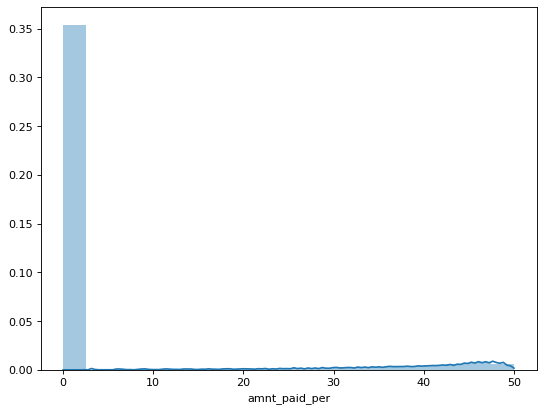

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas.util.testing as tm
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#counts = repaid_per["amnt_paid_per"].value_counts().sort_index()
#colors = plt.cm.tab10(np.arange(len(counts)))
#ax = counts.plot.bar(color=colors)
#repaid_per[repaid_per['target']==0].hist(column='amnt_paid_per',bins = 20)
re = repaid_per[repaid_per['target']==0]
%time sns.distplot(re['amnt_paid_per'],bins = 20)
plt.savefig('test2png.png', dpi=100)

<Figure size 432x288 with 0 Axes>

<Figure size 640x480 with 0 Axes>

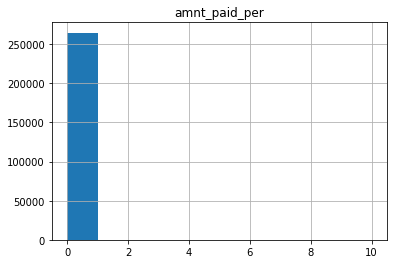

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure
repaid_per['classes'] = repaid_per['class']
figure( figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
re = repaid_per[repaid_per.classes.str.contains('D2')]
#sns.distplot(re['amnt_paid_per'],bins=10)
plt.savefig('D2png.png', dpi=100)
re.hist('amnt_paid_per')
plt.figure()

In [ ]:
re

0          False
1          False
2          False
3          False
4          False
           ...  
1340968    False
1340969    False
1340970    False
1340971     True
1340972    False
Name: classes, Length: 1340973, dtype: bool

<Figure size 432x288 with 0 Axes>

<Figure size 640x480 with 0 Axes>

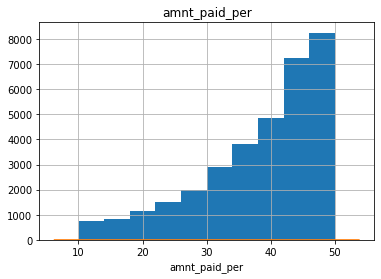

<Figure size 432x288 with 0 Axes>

In [ ]:
figure( figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
re = repaid_per[repaid_per.classes.str.contains('D1')]
re.hist('amnt_paid_per')
sns.distplot(re['amnt_paid_per'],bins=10,hist = False)
plt.savefig('D1png.png', dpi=100)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 640x480 with 0 Axes>

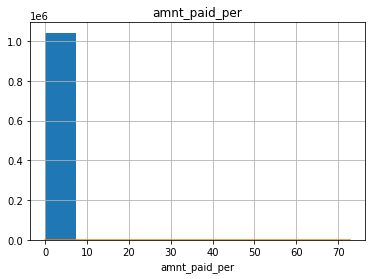

<Figure size 432x288 with 0 Axes>

In [ ]:
re = repaid_per[repaid_per.classes.str.contains('P')]
figure( figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
re.hist('amnt_paid_per')
sns.distplot(re['amnt_paid_per'],bins=10)
plt.savefig('Ppng.png', dpi=100)
plt.figure()

In [ ]:
from pyspark.ml.feature import QuantileDiscretizer

discretizer = QuantileDiscretizer(numBuckets=10, inputCol="amnt_paid_per", outputCol="ranking")
result = discretizer.fit(pastdf.select('amnt_paid_per','target')).transform(pastdf.select('amnt_paid_per','target'))

In [ ]:
rank= result.groupby('target','ranking').count().select('target', 'ranking',f.col('count').alias('freq'))
rank.show()

+------+-------+-------+
|target|ranking|   freq|
+------+-------+-------+
|     1|   null|     70|
|     1|    1.0|1041882|
|     0|    1.0| 298994|
|     0|   null|     27|
+------+-------+-------+



In [ ]:
covariance = {}
for col in pastdf.columns:
  try:
    if col != 'target':
      if str(typ[col]) == 'IntegerType' or str(typ[col]) == 'DoubleType':
        covariance[col] = pastdf.stat.cov(col,'target')
  except:
    continue
print(covariance)

{'loan_amnt': -264.1041157674547, 'funded_amnt': -264.06207381674517, 'funded_amnt_inv': -259.65970320489635, 'int_rate': -0.5266471033326512, 'installment': -6.2559199265024334, 'acc_open_past_24mths': -0.1318660125698178, 'bc_open_to_buy': 473.58207312193446, 'chargeoff_within_12_mths': -0.005483437331860087, 'delinq_amnt': -0.8886197560939193, 'mo_sin_old_il_acct': 0.3628632025276486, 'mo_sin_old_rev_tl_op': 1.6048653338268262, 'mo_sin_rcnt_rev_tl_op': 0.30040348623381535, 'mo_sin_rcnt_tl': 0.16713061180367653, 'mort_acc': 0.06351564551280756, 'mths_since_recent_bc': 0.5873475571793668, 'mths_since_recent_bc_dlq': -0.061447978648610596, 'mths_since_recent_inq': 0.07839521572427999, 'mths_since_recent_revol_delinq': -0.0396132373212854, 'num_accts_ever_120_pd': -0.007397281633356981, 'num_actv_bc_tl': -0.04355430432884893, 'num_actv_rev_tl': -0.10162716772402049, 'num_bc_sats': -0.02334655532396498, 'num_bc_tl': 0.03524681854585572, 'num_il_tl': -0.03439098033497247, 'num_op_rev_tl':

In [ ]:
print(covariance)

{'loan_amnt': -264.1041157674547, 'funded_amnt': -264.06207381674517, 'funded_amnt_inv': -259.65970320489635, 'int_rate': -0.5266471033326512, 'installment': -6.2559199265024334, 'acc_open_past_24mths': -0.1318660125698178, 'bc_open_to_buy': 473.58207312193446, 'chargeoff_within_12_mths': -0.005483437331860087, 'delinq_amnt': -0.8886197560939193, 'mo_sin_old_il_acct': 0.3628632025276486, 'mo_sin_old_rev_tl_op': 1.6048653338268262, 'mo_sin_rcnt_rev_tl_op': 0.30040348623381535, 'mo_sin_rcnt_tl': 0.16713061180367653, 'mort_acc': 0.06351564551280756, 'mths_since_recent_bc': 0.5873475571793668, 'mths_since_recent_bc_dlq': -0.061447978648610596, 'mths_since_recent_inq': 0.07839521572427999, 'mths_since_recent_revol_delinq': -0.0396132373212854, 'num_accts_ever_120_pd': -0.007397281633356981, 'num_actv_bc_tl': -0.04355430432884893, 'num_actv_rev_tl': -0.10162716772402049, 'num_bc_sats': -0.02334655532396498, 'num_bc_tl': 0.03524681854585572, 'num_il_tl': -0.03439098033497247, 'num_op_rev_tl':

In [ ]:
covariance = {'loan_amnt': -264.1041157674547, 'funded_amnt': -264.06207381674517, 'funded_amnt_inv': -259.65970320489635, 'int_rate': -0.5266471033326512, 'installment': -6.2559199265024334, 'acc_open_past_24mths': -0.1318660125698178, 'bc_open_to_buy': 473.58207312193446, 'chargeoff_within_12_mths': -0.005483437331860087, 'delinq_amnt': -0.8886197560939193, 'mo_sin_old_il_acct': 0.3628632025276486, 'mo_sin_old_rev_tl_op': 1.6048653338268262, 'mo_sin_rcnt_rev_tl_op': 0.30040348623381535, 'mo_sin_rcnt_tl': 0.16713061180367653, 'mort_acc': 0.06351564551280756, 'mths_since_recent_bc': 0.5873475571793668, 'mths_since_recent_bc_dlq': -0.061447978648610596, 'mths_since_recent_inq': 0.07839521572427999, 'mths_since_recent_revol_delinq': -0.0396132373212854, 'num_accts_ever_120_pd': -0.007397281633356981, 'num_actv_bc_tl': -0.04355430432884893, 'num_actv_rev_tl': -0.10162716772402049, 'num_bc_sats': -0.02334655532396498, 'num_bc_tl': 0.03524681854585572, 'num_il_tl': -0.03439098033497247, 'num_op_rev_tl': -0.0710267515707296, 'num_rev_accts': 0.015017853699979725, 'num_rev_tl_bal_gt_0': -0.09697338276305655, 'num_sats': -0.07364699256970787, 'num_tl_120dpd_2m': -1.6656618457462235e-05, 'num_tl_30dpd': -6.007273703014685e-05, 'num_tl_90g_dpd_24m': -0.002246698989526907, 'num_tl_op_past_12m': -0.06569537824787004, 'pct_tl_nvr_dlq': -0.12596771165862541, 'percent_bc_gt_75': -0.9204671459959789, 'pub_rec_bankruptcies': -0.0038199536928860403, 'tax_liens': -0.0017704499403580478, 'tot_hi_cred_lim': 5027.172315294499, 'total_bal_ex_mort': -62.479568971609524, 'total_bc_limit': 586.3178157488335, 'total_il_high_credit_limit': -152.0688804034036, 'revol_bal_joint': -72.72999501481904, 'sec_app_inq_last_6mths': -0.07666032371593853, 'sec_app_mort_acc': -0.001415296603328992, 'sec_app_open_acc': -0.02545465200856562, 'sec_app_revol_util': -0.15420207691495724, 'sec_app_open_act_il': -0.007647384609007423, 'sec_app_num_rev_accts': -0.025546549621251774, 'sec_app_chargeoff_within_12_mths': -0.00031807981997065683, 'sec_app_collections_12_mths_ex_med': -0.0005585986795296787, 'sec_app_mths_since_last_major_derog': -0.03161961517016122}

In [ ]:
import seaborn as sns

chunks = [[x:x+5] for x in range(0, len(strcolm), 5)]
plots = []
for i in strcolm:
  ax = sns.countplot(x=i, data=pastdf.select(i).toPandas())
  plots.append(ax)

In [ ]:
erroriv = pastdf.columns
done = pd.read_excel('FinalIV.xlsx')
done = done['Variable'].to_list()
for col in done:
  if col in erroriv:
    erroriv.remove(col)

In [ ]:
print(len(erroriv))

48


In [ ]:
from pyspark.ml.feature import QuantileDiscretizer
from pyspark.sql import functions as f
from pyspark.sql.functions import log
import pandas as pd
from pyspark.sql.functions import lit
from pyspark.sql import Window 
import numpy as np
from tqdm import tqdm

def final_iv(df,target):
  columns = df.columns
  error ={}
  columns.remove(target)
  types = [f.dataType for f in df.schema.fields]
  typ = {columns[i]: types[i] for i in range(len(types)-1)}
  d = pd.DataFrame({},index=[])
  for col in tqdm(columns):
    try:
      print(str(typ[col])+' '+col)
      pdf = df.select(df[col],df[target]).filter(df[col].isNotNull())
      #summ = pdf.select(pdf[col]).summary()
      #pdf.groupby(col).count().show()
      if pdf.count() == 0:
        error[col] = ['Null Columns']
        continue
      if str(typ[col]) not in ['timestamp','TimestampType','string','StringType']:
        pdf = pdf.filter(pdf[col]!= 0.0)
        discretizer = QuantileDiscretizer(numBuckets=10, inputCol=col, outputCol="buckets")
        pdf = discretizer.fit(pdf).transform(pdf)
        pdf = pdf.groupby(target,'buckets').count().select(target,f.col('buckets').alias('Value'),f.col('count').alias('freq'))
      else:
        pdf = pdf.select(f.col(col).alias('Value'),target).groupBy(target,'Value').count().select(target,'Value', f.col('count').alias('freq'))
        if pdf.count() > 20:
          error[col] = ['Too many columns']
          continue
      pdf = pdf.withColumn('percent',f.col('freq')/f.sum('freq').over(Window.partitionBy(target)))
      event = pdf.filter(pdf[target] == 1).drop(target).select('Value',f.col('freq').alias('Event'),f.col('percent').alias('Event%'))
      nonevent = pdf.filter(pdf[target] == 0).drop(target).select('Value',f.col('freq').alias('Non-Event'),f.col('percent').alias('Non-Event%'))
      inner_join = event.join(nonevent,on=['Value'],how='outer')
      inner_join = inner_join.withColumn('WOE',log(f.col('Non-Event%')/f.col('Event%'))).withColumn('Non-Event%-Event%',f.col('Non-Event%')-f.col('Event%')).withColumn('IV',f.col('Non-Event%-Event%')*f.col('WOE'))
      dft =inner_join.withColumn('Variable',lit(col)).toPandas()
      dft.loc['Column_Total']= dft.sum(numeric_only=True, axis=0)
      dft['Variable']['Column_Total']=col
      d = d.append(dft)
    except Exception as e:
     error[col] = [str(e)]
  return d,error

In [ ]:
iv,e = final_iv(newdf,'target')

  0%|          | 0/141 [00:00<?, ?it/s]

IntegerType loan_amnt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  1%|          | 1/141 [00:13<32:26, 13.91s/it]

IntegerType funded_amnt


  1%|▏         | 2/141 [00:27<32:10, 13.89s/it]

DoubleType funded_amnt_inv


  2%|▏         | 3/141 [00:42<32:49, 14.27s/it]

StringType term


  3%|▎         | 4/141 [00:58<33:19, 14.60s/it]

DoubleType int_rate


  4%|▎         | 5/141 [01:11<31:51, 14.06s/it]

DoubleType installment


  4%|▍         | 6/141 [01:24<31:11, 13.86s/it]

StringType grade


  5%|▍         | 7/141 [01:27<23:56, 10.72s/it]

StringType sub_grade


  6%|▌         | 8/141 [01:31<18:46,  8.47s/it]

StringType emp_title


  6%|▋         | 9/141 [01:36<16:27,  7.48s/it]

StringType emp_length


  7%|▋         | 10/141 [01:39<13:39,  6.25s/it]

StringType home_ownership


  8%|▊         | 11/141 [01:52<17:36,  8.13s/it]

DoubleType annual_inc


  9%|▊         | 12/141 [02:04<20:19,  9.46s/it]

StringType verification_status


  9%|▉         | 13/141 [02:16<21:38, 10.14s/it]

TimestampType issue_d


 10%|▉         | 14/141 [02:20<17:23,  8.22s/it]

StringType loan_status


 11%|█         | 15/141 [02:31<19:13,  9.15s/it]

StringType pymnt_plan


 11%|█▏        | 16/141 [02:43<20:52, 10.02s/it]

StringType purpose


 12%|█▏        | 17/141 [02:46<16:28,  7.97s/it]

StringType title


 13%|█▎        | 18/141 [02:49<13:14,  6.46s/it]

DoubleType dti


 13%|█▎        | 19/141 [03:02<17:00,  8.37s/it]

IntegerType delinq_2yrs


 14%|█▍        | 20/141 [03:14<18:52,  9.36s/it]

DoubleType earliest_cr_line


 15%|█▍        | 21/141 [03:24<19:28,  9.73s/it]

IntegerType inq_last_6mths


 16%|█▌        | 22/141 [03:36<20:18, 10.24s/it]

IntegerType mths_since_last_delinq


 16%|█▋        | 23/141 [03:47<20:59, 10.67s/it]

IntegerType mths_since_last_record


 17%|█▋        | 24/141 [03:58<20:53, 10.71s/it]

IntegerType open_acc


 18%|█▊        | 25/141 [04:11<21:44, 11.25s/it]

IntegerType pub_rec


 18%|█▊        | 26/141 [04:22<21:36, 11.28s/it]

DoubleType revol_bal


 19%|█▉        | 27/141 [04:34<22:03, 11.61s/it]

DoubleType revol_util


 20%|█▉        | 28/141 [04:46<22:07, 11.75s/it]

DoubleType total_acc


 21%|██        | 29/141 [04:59<22:07, 11.85s/it]

StringType initial_list_status


 21%|██▏       | 30/141 [05:02<17:24,  9.41s/it]

DoubleType out_prncp


 22%|██▏       | 31/141 [05:13<17:45,  9.69s/it]

DoubleType out_prncp_inv


 23%|██▎       | 32/141 [05:23<18:13, 10.03s/it]

DoubleType total_pymnt


 23%|██▎       | 33/141 [05:35<19:03, 10.59s/it]

DoubleType total_pymnt_inv


 24%|██▍       | 34/141 [05:47<19:28, 10.92s/it]

DoubleType total_rec_prncp


 25%|██▍       | 35/141 [05:59<20:05, 11.38s/it]

DoubleType total_rec_int


 26%|██▌       | 36/141 [06:11<19:57, 11.40s/it]

DoubleType total_rec_late_fee


 26%|██▌       | 37/141 [06:22<19:38, 11.33s/it]

DoubleType recoveries


 27%|██▋       | 38/141 [06:34<19:42, 11.48s/it]

DoubleType collection_recovery_fee


 28%|██▊       | 39/141 [06:45<19:24, 11.42s/it]

TimestampType last_pymnt_d


 28%|██▊       | 40/141 [06:49<15:33,  9.24s/it]

DoubleType last_pymnt_amnt


 29%|██▉       | 41/141 [07:01<16:42, 10.02s/it]

TimestampType next_pymnt_d


 30%|██▉       | 42/141 [07:04<13:05,  7.93s/it]

TimestampType last_credit_pull_d


 30%|███       | 43/141 [07:07<10:23,  6.36s/it]

IntegerType collections_12_mths_ex_med


 31%|███       | 44/141 [07:18<12:24,  7.67s/it]

IntegerType mths_since_last_major_derog


 32%|███▏      | 45/141 [07:29<14:05,  8.80s/it]

IntegerType policy_code


 33%|███▎      | 46/141 [07:41<15:26,  9.75s/it]

StringType application_type


 33%|███▎      | 47/141 [07:45<12:24,  7.92s/it]

DoubleType annual_inc_joint


 34%|███▍      | 48/141 [07:56<13:45,  8.87s/it]

DoubleType dti_joint


 35%|███▍      | 49/141 [08:07<14:43,  9.60s/it]

StringType verification_status_joint


 35%|███▌      | 50/141 [08:11<11:49,  7.80s/it]

IntegerType acc_now_delinq


 36%|███▌      | 51/141 [08:21<12:52,  8.58s/it]

DoubleType tot_coll_amt


 37%|███▋      | 52/141 [08:33<14:07,  9.52s/it]

DoubleType tot_cur_bal


 38%|███▊      | 53/141 [08:45<15:11, 10.36s/it]

IntegerType open_acc_6m


 38%|███▊      | 54/141 [08:57<15:42, 10.83s/it]

IntegerType open_act_il


 39%|███▉      | 55/141 [09:09<15:48, 11.03s/it]

IntegerType open_il_12m


 40%|███▉      | 56/141 [09:20<15:54, 11.23s/it]

IntegerType open_il_24m


 40%|████      | 57/141 [09:33<16:11, 11.56s/it]

IntegerType mths_since_rcnt_il


 41%|████      | 58/141 [09:44<15:52, 11.48s/it]

DoubleType total_bal_il


 42%|████▏     | 59/141 [09:56<15:49, 11.58s/it]

DoubleType il_util


 43%|████▎     | 60/141 [10:09<16:07, 11.94s/it]

IntegerType open_rv_12m


 43%|████▎     | 61/141 [10:20<15:51, 11.89s/it]

IntegerType open_rv_24m


 44%|████▍     | 62/141 [10:33<15:50, 12.03s/it]

DoubleType max_bal_bc


 45%|████▍     | 63/141 [10:45<15:47, 12.14s/it]

DoubleType all_util


 45%|████▌     | 64/141 [10:57<15:28, 12.05s/it]

DoubleType total_rev_hi_lim


 46%|████▌     | 65/141 [11:09<15:25, 12.18s/it]

IntegerType inq_fi


 47%|████▋     | 66/141 [11:22<15:13, 12.18s/it]

IntegerType total_cu_tl


 48%|████▊     | 67/141 [11:33<14:49, 12.03s/it]

IntegerType inq_last_12m


 48%|████▊     | 68/141 [11:44<14:14, 11.71s/it]

IntegerType acc_open_past_24mths


 49%|████▉     | 69/141 [11:57<14:28, 12.06s/it]

DoubleType avg_cur_bal


 50%|████▉     | 70/141 [12:09<14:17, 12.08s/it]

IntegerType bc_open_to_buy


 50%|█████     | 71/141 [12:22<14:14, 12.21s/it]

DoubleType bc_util


 51%|█████     | 72/141 [12:34<14:13, 12.37s/it]

DoubleType chargeoff_within_12_mths


 52%|█████▏    | 73/141 [12:47<14:03, 12.40s/it]

IntegerType delinq_amnt


 52%|█████▏    | 74/141 [12:59<13:45, 12.33s/it]

DoubleType mo_sin_old_il_acct


 53%|█████▎    | 75/141 [13:12<13:39, 12.42s/it]

IntegerType mo_sin_old_rev_tl_op


 54%|█████▍    | 76/141 [13:25<13:34, 12.53s/it]

IntegerType mo_sin_rcnt_rev_tl_op


 55%|█████▍    | 77/141 [13:37<13:22, 12.53s/it]

IntegerType mo_sin_rcnt_tl


 55%|█████▌    | 78/141 [13:50<13:21, 12.72s/it]

IntegerType mort_acc


 56%|█████▌    | 79/141 [14:02<12:55, 12.50s/it]

IntegerType mths_since_recent_bc


 57%|█████▋    | 80/141 [14:15<12:49, 12.61s/it]

IntegerType mths_since_recent_bc_dlq


 57%|█████▋    | 81/141 [14:27<12:18, 12.31s/it]

IntegerType mths_since_recent_inq


 58%|█████▊    | 82/141 [14:39<12:06, 12.32s/it]

IntegerType mths_since_recent_revol_delinq


 59%|█████▉    | 83/141 [14:52<12:03, 12.48s/it]

IntegerType num_accts_ever_120_pd


 60%|█████▉    | 84/141 [15:04<11:44, 12.35s/it]

IntegerType num_actv_bc_tl


 60%|██████    | 85/141 [15:16<11:31, 12.35s/it]

IntegerType num_actv_rev_tl


 61%|██████    | 86/141 [15:30<11:34, 12.63s/it]

IntegerType num_bc_sats


 62%|██████▏   | 87/141 [15:42<11:20, 12.60s/it]

IntegerType num_bc_tl


 62%|██████▏   | 88/141 [15:55<11:16, 12.77s/it]

IntegerType num_il_tl


 63%|██████▎   | 89/141 [16:08<11:05, 12.81s/it]

IntegerType num_op_rev_tl


 64%|██████▍   | 90/141 [16:21<10:49, 12.74s/it]

IntegerType num_rev_accts


 65%|██████▍   | 91/141 [16:34<10:38, 12.77s/it]

IntegerType num_rev_tl_bal_gt_0


 65%|██████▌   | 92/141 [16:47<10:31, 12.89s/it]

IntegerType num_sats


 66%|██████▌   | 93/141 [16:59<10:16, 12.84s/it]

IntegerType num_tl_120dpd_2m


 67%|██████▋   | 94/141 [17:11<09:40, 12.35s/it]

IntegerType num_tl_30dpd


 67%|██████▋   | 95/141 [17:23<09:26, 12.31s/it]

IntegerType num_tl_90g_dpd_24m


 68%|██████▊   | 96/141 [17:37<09:35, 12.80s/it]

IntegerType num_tl_op_past_12m


 69%|██████▉   | 97/141 [17:48<09:06, 12.41s/it]

DoubleType pct_tl_nvr_dlq


 70%|██████▉   | 98/141 [18:02<09:13, 12.86s/it]

DoubleType percent_bc_gt_75


 70%|███████   | 99/141 [18:14<08:48, 12.58s/it]

IntegerType pub_rec_bankruptcies


 71%|███████   | 100/141 [18:26<08:25, 12.32s/it]

IntegerType tax_liens


 72%|███████▏  | 101/141 [18:38<08:15, 12.40s/it]

IntegerType tot_hi_cred_lim


 72%|███████▏  | 102/141 [18:52<08:14, 12.67s/it]

IntegerType total_bal_ex_mort


 73%|███████▎  | 103/141 [19:05<08:09, 12.88s/it]

IntegerType total_bc_limit


 74%|███████▍  | 104/141 [19:17<07:46, 12.60s/it]

IntegerType total_il_high_credit_limit


 74%|███████▍  | 105/141 [19:30<07:37, 12.72s/it]

IntegerType revol_bal_joint


 75%|███████▌  | 106/141 [19:43<07:24, 12.71s/it]

DoubleType sec_app_earliest_cr_line


 76%|███████▌  | 107/141 [19:54<06:57, 12.27s/it]

IntegerType sec_app_inq_last_6mths


 77%|███████▋  | 108/141 [20:06<06:37, 12.06s/it]

IntegerType sec_app_mort_acc


 77%|███████▋  | 109/141 [20:18<06:27, 12.10s/it]

IntegerType sec_app_open_acc


 78%|███████▊  | 110/141 [20:30<06:15, 12.12s/it]

DoubleType sec_app_revol_util


 79%|███████▊  | 111/141 [20:43<06:09, 12.31s/it]

IntegerType sec_app_open_act_il


 79%|███████▉  | 112/141 [20:56<06:06, 12.64s/it]

IntegerType sec_app_num_rev_accts


 80%|████████  | 113/141 [21:09<05:55, 12.68s/it]

IntegerType sec_app_chargeoff_within_12_mths


 81%|████████  | 114/141 [21:21<05:34, 12.40s/it]

IntegerType sec_app_collections_12_mths_ex_med


 82%|████████▏ | 115/141 [21:33<05:24, 12.48s/it]

IntegerType sec_app_mths_since_last_major_derog


 82%|████████▏ | 116/141 [21:45<05:07, 12.29s/it]

StringType hardship_flag


 83%|████████▎ | 117/141 [22:00<05:11, 12.96s/it]

StringType hardship_type


 84%|████████▎ | 118/141 [22:13<04:58, 12.96s/it]

StringType hardship_reason


 84%|████████▍ | 119/141 [22:16<03:42, 10.09s/it]

StringType hardship_status


 85%|████████▌ | 120/141 [22:29<03:50, 10.96s/it]

IntegerType deferral_term


 86%|████████▌ | 121/141 [22:41<03:43, 11.18s/it]

DoubleType hardship_amount


 87%|████████▋ | 122/141 [22:54<03:45, 11.89s/it]

TimestampType hardship_start_date


 87%|████████▋ | 123/141 [23:00<02:59,  9.99s/it]

TimestampType hardship_end_date


 88%|████████▊ | 124/141 [23:04<02:18,  8.16s/it]

TimestampType payment_plan_start_date


 89%|████████▊ | 125/141 [23:08<01:52,  7.05s/it]

IntegerType hardship_length


 89%|████████▉ | 126/141 [23:20<02:07,  8.48s/it]

IntegerType hardship_dpd


 90%|█████████ | 127/141 [23:34<02:21, 10.11s/it]

StringType hardship_loan_status


 91%|█████████ | 128/141 [23:48<02:27, 11.34s/it]

DoubleType orig_projected_additional_accrued_interest


 91%|█████████▏| 129/141 [24:02<02:26, 12.20s/it]

DoubleType hardship_payoff_balance_amount


 92%|█████████▏| 130/141 [24:15<02:14, 12.21s/it]

DoubleType hardship_last_payment_amount


 93%|█████████▎| 131/141 [24:27<02:02, 12.26s/it]

StringType disbursement_method


 94%|█████████▎| 132/141 [24:40<01:52, 12.46s/it]

StringType debt_settlement_flag


 94%|█████████▍| 133/141 [24:53<01:41, 12.71s/it]

TimestampType debt_settlement_flag_date


 95%|█████████▌| 134/141 [24:58<01:11, 10.24s/it]

StringType settlement_status


 96%|█████████▌| 135/141 [25:10<01:05, 10.94s/it]

TimestampType settlement_date


 96%|█████████▋| 136/141 [25:14<00:44,  8.80s/it]

DoubleType settlement_amount


 97%|█████████▋| 137/141 [25:27<00:39,  9.94s/it]

DoubleType settlement_percentage


 98%|█████████▊| 138/141 [25:39<00:31, 10.65s/it]

IntegerType settlement_term


 99%|█████████▊| 139/141 [25:50<00:21, 10.93s/it]

DoubleType amnt_left_per


 99%|█████████▉| 140/141 [26:03<00:11, 11.47s/it]

IntegerType id


100%|██████████| 141/141 [26:16<00:00, 11.18s/it]


In [ ]:
iv.to_excel('Information_Value.xlsx')

In [ ]:
pd.DataFrame(e.items(),columns=['Variable','IV']).to_excel('eIV.xlsx')

In [ ]:
error = pastdf.columns
done = pd.read_excel('gini(1).xlsx',index=None)
done = done['Column'].to_list()
for col in error:
  if col in done:
    error.remove(col)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import metrics

def gini(actual, pred):
  #print('gini')
  assert (len(actual) == len(pred))
  all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
  all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
  totalLosses = all[:, 0].sum()
  giniSum = all[:, 0].cumsum().sum() / totalLosses

  giniSum -= (len(actual) + 1) / 2.
  return giniSum / len(actual)


def gini_normalized(actual, pred):
  return gini(actual, pred) / gini(actual, actual)


def giniIndex(df,target):
  gicols = {}
  error={}
  columns = df.columns
  types = [f.dataType for f in df.schema.fields]
  typ = {columns[i]: types[i] for i in range(len(types))}
  columns.remove(target)
  tar = df.select(target)
  tar = np.array(tar.collect())
  tar[tar==2]=1
  for col in tqdm(columns):
    print(col)
    try:
      if str(typ[col]) not in ['StringType','DateType']:
        pred = df.select(col)
        pred =np.array(pred.collect())
        fpr, tpr, thresholds = metrics.roc_curve(tar, pred)
        auc = metrics.auc(fpr, tpr)
        gini = 2*auc -1
        #print(gicols[col])
        gicols[col] =  gini  
      else:
        gicols[col]= typ[col]
        '''
        
        dft_a = dft.select(col).toPandas().values.cumsum()
        dft_b = dft.select(target).toPandas().values.cumsum()
        dft_a =dft_a/ dft_a[-1]
        dft_b = dft_b / dft_b[-1]
        dft_a = pd.Series(dft_a)
        dft_b = pd.Series(dft_b)
        gini = dft_b.subtract(dft_a)
        dft_a.plot()
        dft_b.plot()
        gini.plot()
        gini = gini.sum()/len(gini)
        gini_normalized(tar, pred) 
        '''   
        
    except Exception as e:
      error[col] = e
  return (gicols,error)

In [ ]:
chunks = [pastdf.columns[x:x+40] for x in range(0, len(pastdf.columns), 40)]

In [ ]:
gini={}
er={}

In [ ]:
for i in tqdm(chunks):
  if 'target' not in i:
    i.append('target')
  gi,e = giniIndex(pastdf.select(*i),'target')
  gini.update(gi)
  er.update(e)

  0%|          | 0/40 [00:00<?, ?it/s]

id



  2%|▎         | 1/40 [00:15<10:07, 15.57s/it]

member_id



  5%|▌         | 2/40 [00:30<09:39, 15.24s/it]

loan_amnt



  8%|▊         | 3/40 [00:45<09:26, 15.31s/it]

funded_amnt



 10%|█         | 4/40 [00:59<09:01, 15.03s/it]

funded_amnt_inv



 12%|█▎        | 5/40 [01:14<08:41, 14.90s/it]

term
int_rate



 18%|█▊        | 7/40 [01:28<06:54, 12.55s/it]

installment



 20%|██        | 8/40 [01:42<06:58, 13.09s/it]

grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc



 35%|███▌      | 14/40 [01:56<04:16,  9.86s/it]

verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti



 62%|██████▎   | 25/40 [02:11<01:49,  7.30s/it]

delinq_2yrs



 65%|██████▌   | 26/40 [02:25<02:10,  9.31s/it]

earliest_cr_line



 68%|██████▊   | 27/40 [02:40<02:21, 10.88s/it]

inq_last_6mths



 70%|███████   | 28/40 [02:54<02:22, 11.85s/it]

mths_since_last_delinq



 72%|███████▎  | 29/40 [03:09<02:20, 12.73s/it]

mths_since_last_record



 75%|███████▌  | 30/40 [03:24<02:14, 13.40s/it]

open_acc



 78%|███████▊  | 31/40 [03:38<02:03, 13.71s/it]

pub_rec



 80%|████████  | 32/40 [03:52<01:50, 13.83s/it]

revol_bal



 82%|████████▎ | 33/40 [04:06<01:37, 13.96s/it]

revol_util



 85%|████████▌ | 34/40 [04:21<01:24, 14.07s/it]

total_acc



 88%|████████▊ | 35/40 [04:36<01:11, 14.32s/it]

initial_list_status
out_prncp



 92%|█████████▎| 37/40 [04:50<00:36, 12.13s/it]

out_prncp_inv



 95%|█████████▌| 38/40 [05:05<00:25, 12.96s/it]

total_pymnt



 98%|█████████▊| 39/40 [05:20<00:13, 13.65s/it]

total_pymnt_inv



  0%|          | 0/40 [00:00<?, ?it/s]

total_rec_prncp



  2%|▎         | 1/40 [00:14<09:22, 14.42s/it]

total_rec_int



  5%|▌         | 2/40 [00:28<09:09, 14.45s/it]

total_rec_late_fee



  8%|▊         | 3/40 [00:43<08:57, 14.53s/it]

recoveries



 10%|█         | 4/40 [00:57<08:31, 14.20s/it]

collection_recovery_fee



 12%|█▎        | 5/40 [01:10<08:13, 14.11s/it]

last_pymnt_d
last_pymnt_amnt



 18%|█▊        | 7/40 [01:25<06:37, 12.05s/it]

next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med



 25%|██▌       | 10/40 [01:39<04:55,  9.84s/it]

mths_since_last_major_derog



 28%|██▊       | 11/40 [01:53<05:24, 11.19s/it]

policy_code



 30%|███       | 12/40 [02:08<05:38, 12.08s/it]

application_type
annual_inc_joint



 35%|███▌      | 14/40 [02:21<04:34, 10.54s/it]

dti_joint



 38%|███▊      | 15/40 [02:36<04:53, 11.75s/it]

verification_status_joint
acc_now_delinq



 42%|████▎     | 17/40 [02:50<03:57, 10.32s/it]

tot_coll_amt



 45%|████▌     | 18/40 [03:05<04:15, 11.61s/it]

tot_cur_bal



 48%|████▊     | 19/40 [03:20<04:25, 12.66s/it]

open_acc_6m



 50%|█████     | 20/40 [03:34<04:23, 13.17s/it]

open_act_il



 52%|█████▎    | 21/40 [03:49<04:22, 13.80s/it]

open_il_12m



 55%|█████▌    | 22/40 [04:04<04:12, 14.01s/it]

open_il_24m



 57%|█████▊    | 23/40 [04:19<04:05, 14.42s/it]

mths_since_rcnt_il



 60%|██████    | 24/40 [04:33<03:48, 14.25s/it]

total_bal_il



 62%|██████▎   | 25/40 [04:47<03:32, 14.18s/it]

il_util



 65%|██████▌   | 26/40 [05:01<03:19, 14.23s/it]

open_rv_12m



 68%|██████▊   | 27/40 [05:16<03:07, 14.42s/it]

open_rv_24m



 70%|███████   | 28/40 [05:31<02:52, 14.38s/it]

max_bal_bc



 72%|███████▎  | 29/40 [05:45<02:38, 14.41s/it]

all_util



 75%|███████▌  | 30/40 [05:59<02:23, 14.33s/it]

total_rev_hi_lim



 78%|███████▊  | 31/40 [06:13<02:08, 14.30s/it]

inq_fi



 80%|████████  | 32/40 [06:27<01:53, 14.23s/it]

total_cu_tl



 82%|████████▎ | 33/40 [06:42<01:39, 14.20s/it]

inq_last_12m



 85%|████████▌ | 34/40 [06:56<01:25, 14.30s/it]

acc_open_past_24mths



 88%|████████▊ | 35/40 [07:11<01:12, 14.43s/it]

avg_cur_bal



 90%|█████████ | 36/40 [07:25<00:57, 14.31s/it]

bc_open_to_buy



 92%|█████████▎| 37/40 [07:39<00:42, 14.20s/it]

bc_util



 95%|█████████▌| 38/40 [07:53<00:28, 14.24s/it]

chargeoff_within_12_mths



 98%|█████████▊| 39/40 [08:08<00:14, 14.28s/it]

delinq_amnt



  0%|          | 0/40 [00:00<?, ?it/s]

mo_sin_old_il_acct



  2%|▎         | 1/40 [00:14<09:19, 14.34s/it]

mo_sin_old_rev_tl_op



  5%|▌         | 2/40 [00:30<09:25, 14.88s/it]

mo_sin_rcnt_rev_tl_op



  8%|▊         | 3/40 [00:45<09:08, 14.84s/it]

mo_sin_rcnt_tl



 10%|█         | 4/40 [01:00<08:55, 14.86s/it]

mort_acc



 12%|█▎        | 5/40 [01:15<08:44, 14.98s/it]

mths_since_recent_bc



 15%|█▌        | 6/40 [01:29<08:15, 14.57s/it]

mths_since_recent_bc_dlq



 18%|█▊        | 7/40 [01:42<07:54, 14.37s/it]

mths_since_recent_inq



 20%|██        | 8/40 [01:56<07:36, 14.26s/it]

mths_since_recent_revol_delinq



 22%|██▎       | 9/40 [02:11<07:22, 14.28s/it]

num_accts_ever_120_pd



 25%|██▌       | 10/40 [02:24<07:02, 14.07s/it]

num_actv_bc_tl



 28%|██▊       | 11/40 [02:39<06:54, 14.31s/it]

num_actv_rev_tl



 30%|███       | 12/40 [02:53<06:38, 14.25s/it]

num_bc_sats



 32%|███▎      | 13/40 [03:08<06:24, 14.25s/it]

num_bc_tl



 35%|███▌      | 14/40 [03:23<06:16, 14.47s/it]

num_il_tl



 38%|███▊      | 15/40 [03:37<06:03, 14.53s/it]

num_op_rev_tl



 40%|████      | 16/40 [03:52<05:47, 14.48s/it]

num_rev_accts



 42%|████▎     | 17/40 [04:06<05:32, 14.44s/it]

num_rev_tl_bal_gt_0



 45%|████▌     | 18/40 [04:21<05:19, 14.53s/it]

num_sats



 48%|████▊     | 19/40 [04:36<05:07, 14.65s/it]

num_tl_120dpd_2m



 50%|█████     | 20/40 [04:50<04:51, 14.58s/it]

num_tl_30dpd



 52%|█████▎    | 21/40 [05:04<04:34, 14.45s/it]

num_tl_90g_dpd_24m



 55%|█████▌    | 22/40 [05:18<04:18, 14.39s/it]

num_tl_op_past_12m



 57%|█████▊    | 23/40 [05:34<04:09, 14.69s/it]

pct_tl_nvr_dlq



 60%|██████    | 24/40 [05:51<04:06, 15.38s/it]

percent_bc_gt_75



 62%|██████▎   | 25/40 [06:05<03:45, 15.07s/it]

pub_rec_bankruptcies



 65%|██████▌   | 26/40 [06:20<03:28, 14.93s/it]

tax_liens



 68%|██████▊   | 27/40 [06:34<03:11, 14.73s/it]

tot_hi_cred_lim



 70%|███████   | 28/40 [06:50<03:02, 15.24s/it]

total_bal_ex_mort



 72%|███████▎  | 29/40 [07:07<02:51, 15.60s/it]

total_bc_limit



 75%|███████▌  | 30/40 [07:24<02:39, 15.97s/it]

total_il_high_credit_limit



 78%|███████▊  | 31/40 [07:40<02:24, 16.08s/it]

revol_bal_joint



 80%|████████  | 32/40 [07:53<02:02, 15.28s/it]

sec_app_earliest_cr_line
sec_app_inq_last_6mths



 85%|████████▌ | 34/40 [08:07<01:16, 12.71s/it]

sec_app_mort_acc



 88%|████████▊ | 35/40 [08:21<01:05, 13.06s/it]

sec_app_open_acc



 90%|█████████ | 36/40 [08:35<00:53, 13.30s/it]

sec_app_revol_util



 92%|█████████▎| 37/40 [08:48<00:40, 13.44s/it]

sec_app_open_act_il



 95%|█████████▌| 38/40 [09:02<00:27, 13.53s/it]

sec_app_num_rev_accts



 98%|█████████▊| 39/40 [09:16<00:13, 13.75s/it]

sec_app_chargeoff_within_12_mths



  0%|          | 0/26 [00:00<?, ?it/s]

sec_app_collections_12_mths_ex_med



  4%|▍         | 1/26 [00:14<05:53, 14.14s/it]

sec_app_mths_since_last_major_derog



  8%|▊         | 2/26 [00:27<05:36, 14.03s/it]

hardship_flag
hardship_type
hardship_reason
hardship_status
deferral_term



 27%|██▋       | 7/26 [00:41<03:22, 10.66s/it]

hardship_amount



 31%|███       | 8/26 [00:55<03:29, 11.63s/it]

hardship_start_date
hardship_end_date
payment_plan_start_date
hardship_length



 46%|████▌     | 12/26 [01:09<02:08,  9.16s/it]

hardship_dpd



 50%|█████     | 13/26 [01:22<02:15, 10.44s/it]

hardship_loan_status
orig_projected_additional_accrued_interest



 58%|█████▊    | 15/26 [01:36<01:43,  9.40s/it]

hardship_payoff_balance_amount



 62%|██████▏   | 16/26 [01:50<01:47, 10.80s/it]

hardship_last_payment_amount



 65%|██████▌   | 17/26 [02:04<01:44, 11.57s/it]

disbursement_method
debt_settlement_flag
debt_settlement_flag_date
settlement_status
settlement_date
settlement_amount



 88%|████████▊ | 23/26 [02:17<00:26,  8.77s/it]

settlement_percentage



 92%|█████████▏| 24/26 [02:31<00:20, 10.37s/it]

settlement_term



 96%|█████████▌| 25/26 [02:45<00:11, 11.34s/it]

amnt_left_per



100%|██████████| 4/4 [27:26<00:00, 411.54s/it]


In [ ]:
e

{'sec_app_collections_12_mths_ex_med': TypeError("'<' not supported between instances of 'int' and 'NoneType'"),
 'sec_app_mths_since_last_major_derog': TypeError("'<' not supported between instances of 'int' and 'NoneType'")}

In [ ]:
p = pd.DataFrame(gini.items(),columns = ['Column', 'gini'])
p.to_excel('giniall.xlsx')
print(p)

                    Column       gini
0                       id -0.0939963
1                member_id          0
2                loan_amnt    0.10972
3              funded_amnt   0.109881
4          funded_amnt_inv   0.109885
..                     ...        ...
96         settlement_date   DateType
97       settlement_amount   0.111438
98   settlement_percentage   0.111438
99         settlement_term   0.102247
100          amnt_left_per  -0.999077

[101 rows x 2 columns]


In [ ]:
print(e)

{'acc_open_past_24mths': ValueError('unknown format is not supported',), 'bc_open_to_buy': ValueError('unknown format is not supported',), 'chargeoff_within_12_mths': ValueError('unknown format is not supported',), 'delinq_amnt': ValueError('unknown format is not supported',), 'mo_sin_old_il_acct': ValueError('unknown format is not supported',), 'mo_sin_old_rev_tl_op': ValueError('unknown format is not supported',), 'mo_sin_rcnt_rev_tl_op': ValueError('unknown format is not supported',), 'mo_sin_rcnt_tl': ValueError('unknown format is not supported',), 'mort_acc': ValueError('unknown format is not supported',), 'mths_since_recent_bc': ValueError('unknown format is not supported',), 'mths_since_recent_bc_dlq': ValueError('unknown format is not supported',), 'mths_since_recent_inq': ValueError('unknown format is not supported',), 'mths_since_recent_revol_delinq': ValueError('unknown format is not supported',), 'num_accts_ever_120_pd': ValueError('unknown format is not supported',), 'num_

In [ ]:
p.to_excel('leftGini.xlsx')

In [ ]:
done = p['Column'].to_list()

In [ ]:
pastdf.count()

1338224

In [ ]:
gini = dft_b.subtract(dft_a)

In [ ]:
gini = gini.sum()/len(gini)

In [ ]:
gini

0.13885911992352912

In [ ]:
pastdf.select('desc').groupby('desc').count().toPandas().plot.bar()

In [ ]:
print(norows)

In [ ]:
pdf = stats.toPandas()
pdf_T = pdf.T
pdf_T.columns = pdf_T.iloc[0]
pdf_T = pdf_T[1:]
pdf_T['fill%'] = (pdf_T['count'].astype(int)/norows)*100
pdf_T.to_excel("CleanDataStatistics.xlsx")

In [ ]:
pdf_T

summary                  count                mean  ... type types
id                           0                None  ...  NaN   NaN
member_id                    0                None  ...  NaN   NaN
loan_amnt              2260668  15046.931227849467  ...  NaN   NaN
funded_amnt            2260668  15041.664056818605  ...  NaN   NaN
funded_amnt_inv        2260668  15023.437623660864  ...  NaN   NaN
...                        ...                 ...  ...  ...   ...
debt_settlement_flag   2260475                None  ...  NaN   NaN
settlement_status        33141                None  ...  NaN   NaN
settlement_amount        33055   5030.565748298294  ...  NaN   NaN
settlement_percentage    33055   47.77598608379996  ...  NaN   NaN
settlement_term          33055   13.14899410074119  ...  NaN   NaN

[134 rows x 12 columns]


In [ ]:
typepd = []
for col in pdf_T.index.copy():
  typepd.append(typ[col])
print(typepd)

[StringType, StringType, IntegerType, IntegerType, DoubleType, StringType, DoubleType, DoubleType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, StringType, IntegerType, StringType, IntegerType, StringType, DoubleType, IntegerType, DoubleType, IntegerType, IntegerType, IntegerType, IntegerType, IntegerType, Integ

In [ ]:

import collections
ctr = collections.Counter(types)
print(ctr)
pd.DataFrame(typepd).to_excel('types.xlsx')

Counter({IntegerType: 69, DoubleType: 37, StringType: 28, DateType: 11})


In [ ]:
columns = pastdf.columns
types = [f.dataType for f in pastdf.schema.fields]
typ = {columns[i]: types[i] for i in range(len(types))}
columns.remove('target')
i = ['target']
for col in columns:
  if str(typ[col]) in ['IntegerType','DoubleType']:
    i.append(col)

In [ ]:
p = pd.DataFrame(ge.items(),columns = ['Column', 'gini'])
p.to_excel('/content/drive/My Drive/Lending-Club/giniFinal.xlsx')
print(p)

                            Column        gini
0                        loan_amnt    9.139672
1                      funded_amnt    9.160549
2                  funded_amnt_inv    9.123879
3                         int_rate   35.731587
4                      installment    7.999048
..                             ...         ...
83                  total_bc_limit  -13.815569
84      total_il_high_credit_limit   -3.563571
85  hardship_payoff_balance_amount   10.389696
86    hardship_last_payment_amount   10.389696
87                   amnt_left_per -111.367517

[88 rows x 2 columns]


In [ ]:
corr = pd.read_excel('Covariance.xlsx')
corr = corr.dropna(axis =1,how ='all')
corr =corr.set_index('.')

In [ ]:
cor = corr[corr>0.6]
cor = cor[cor!=1]

In [ ]:
cor = corc.dropna(axis =1,how ='all')

In [ ]:
drop = pd.DataFrame(index=None,columns=['Column1','Column2','Correlation'])
i=0
for col in cor:
  c = cor[col]
  c =c[c>0]
  for j in c.index:
    drop.loc[i] = [col,j,c[j]]
    i=i+1

In [ ]:
drop.to_excel('dropOnCorr.xlsx')

In [ ]:
!pip install tensorflowonspark

     |████████████████████████████████| 51kB 5.7MB/s 


In [ ]:
foe = foriv.toPandas()

In [ ]:
foe

,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,mths_since_last_major_derog,dti_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_12m,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,...,num_actv_rev_tl,num_bc_sats,num_il_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_status,hardship_amount,hardship_dpd,hardship_loan_status,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term,target
0,36 months,7.56,622.68,A,A3,MORTGAGE,Not Verified,18.92,0.0,0.0,48.0,NaN,0.0,0.0,0.0,20215.792430,20215.79,215.79,0.0,0.00,0.0000,20228.39,NaN,11.75,0.0,515779.0,1.0,2.0,0.0,1.0,13.0,71.0,1.0,2.0,39.0,2.0,2.0,0.0,5.0,57309.0,...,5.0,5.0,5.0,9.0,5.0,9.0,0.0,0.0,0.0,1.0,94.7,20.0,0.0,0.0,622183.0,71569.0,85100.0,43287.0,NaN,0.0,3.0,29.7,2.0,7.0,0.0,0.0,NaN,None,None,NaN,NaN,None,NaN,NaN,N,None,NaN,NaN,NaN,0
1,36 months,7.56,249.08,A,A3,MORTGAGE,Not Verified,20.10,0.0,0.0,NaN,NaN,0.0,0.0,0.0,8053.551386,8053.55,53.55,0.0,0.00,0.0000,8058.59,NaN,NaN,0.0,839055.0,1.0,2.0,0.0,2.0,18.0,NaN,1.0,3.0,61.0,3.0,4.0,2.0,6.0,49356.0,...,8.0,10.0,11.0,14.0,8.0,17.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,950005.0,203042.0,174100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,N,None,NaN,NaN,NaN,0
2,36 months,7.56,155.67,A,A3,MORTGAGE,Not Verified,14.78,0.0,0.0,59.0,NaN,0.0,0.0,0.0,5013.650000,5013.65,13.65,0.0,0.00,0.0000,5016.80,79.0,NaN,0.0,50831.0,1.0,3.0,1.0,3.0,2.0,83.0,0.0,1.0,76.0,3.0,3.0,0.0,4.0,8472.0,...,2.0,1.0,7.0,4.0,2.0,6.0,0.0,0.0,0.0,1.0,92.3,0.0,0.0,0.0,67363.0,50831.0,7500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,N,None,NaN,NaN,NaN,0
3,36 months,10.72,195.64,B,B2,MORTGAGE,Not Verified,13.37,0.0,1.0,NaN,NaN,0.0,0.0,0.0,6035.733333,6035.73,35.73,0.0,0.00,0.0000,6041.09,NaN,NaN,0.0,22225.0,1.0,2.0,1.0,1.0,5.0,73.0,0.0,2.0,46.0,1.0,2.0,6.0,3.0,3175.0,...,3.0,3.0,9.0,9.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,47959.0,22225.0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,N,None,NaN,NaN,NaN,0
4,36 months,11.80,298.07,B,B4,OWN,Not Verified,14.47,0.0,2.0,NaN,NaN,0.0,0.0,0.0,9041.300000,9041.30,41.30,0.0,0.00,0.0000,9050.15,NaN,NaN,0.0,31261.0,3.0,2.0,2.0,4.0,1.0,92.0,5.0,13.0,22.0,2.0,0.0,2.0,18.0,1116.0,...,8.0,17.0,11.0,44.0,8.0,28.0,0.0,0.0,0.0,8.0,100.0,0.0,0.0,0.0,159714.0,31261.0,111700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,N,None,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201588,36 months,24.85,242.06,E,E3,RENT,Verified,37.31,0.0,0.0,NaN,NaN,0.0,0.0,0.0,7444.196732,7444.20,1344.20,0.0,0.00,0.0000,4348.33,NaN,NaN,0.0,16762.0,0.0,1.0,0.0,0.0,42.0,60.0,1.0,1.0,68.0,0.0,1.0,1.0,1.0,4191.0,...,3.0,2.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,24619.0,16762.0,4300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,N,None,N

In [ ]:
columns = foriv.columns
types = [f.dataType for f in foriv.schema.fields]
typ = {columns[i]: types[i] for i in range(len(types))}
for col in columns:
  if str(typ[col]) in ['StringType','DateType']:
    foe = foe.drop(col,axis=1)

In [ ]:
df = newdf.cache()

In [ ]:
columns = newdf.columns
types = [f.dataType for f in newdf.schema.fields]
typ = {columns[i]: types[i] for i in range(len(types))}
reg = []
clas=[]
columns.remove('target')
for col in columns:
  if (str(typ[col]) == 'StringType') or (str(typ[col])=='TimestampType'):
    clas.append(col)
  else:
    reg.append(col)
print(clas)
print(reg)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date']
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last

In [ ]:
clas = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'term', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date']
reg = ['int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'amnt_left_per', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'amnt_left_per', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'amnt_left_per', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'amnt_left_per', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'amnt_left_per', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'amnt_left_per', 'id']
date = []

In [ ]:
columns = newdf.columns
types = [f.dataType for f in newdf.schema.fields]
typ = {columns[i]: types[i] for i in range(len(types))}


In [ ]:
for col in reg:
  if str(typ[col]) == 'TimestampType':
    reg.remove(col)
    date.append(col)

In [ ]:
y = df.select('target').cache()
X = df.drop('target')

In [ ]:
X_reg = X.select(*reg).cache()
X_clas = X.select(*clas).cache()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression,f_classif
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

In [ ]:
!pip install joblibspark

In [ ]:
import pandas as pd

#X = pd.read_csv('/content/drive/My Drive/Lending-Club/loanFinal.csv')
X = pd.read_csv('/content/drive/My Drive/Lending-Club/loanFinal.csv', header=0, escapechar='\\')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (41,49,117,118,119,122,123,124,127) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#y = X.pop('target')
X_reg = X[reg].fillna(0)
#X_clas = X[clas].fillna('')

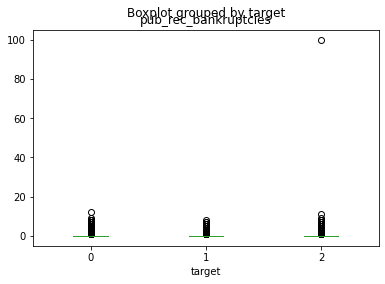

In [ ]:
pdf = newdf.select('pub_rec_bankruptcies','target').toPandas()
pdf.boxplot(by ='target', column =['pub_rec_bankruptcies'], grid = False)

In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
fs = spark.createDataFrame([
   (Vectors.dense([1, 2, 0]),),
   (Vectors.dense([2, 0, 1]),),
   (Vectors.dense([0, 1, 0]),)], ("features", ))
fs.show()
pca = PCA(k=2, inputCol="features", outputCol="pca")
model = pca.fit(fs)
transformed = model.transform(fs)

+-------------+
|     features|
+-------------+
|[1.0,2.0,0.0]|
|[2.0,0.0,1.0]|
|[0.0,1.0,0.0]|
+-------------+



In [ ]:
transformed.toPandas()

,features,pca
0,"[1.0, 2.0, 0.0]","[0.6396021490668312, -2.121320343559643]"
1,"[2.0, 0.0, 1.0]","[-1.7056057308448838, -1.414213562373095]"
2,"[0.0, 1.0, 0.0]","[0.6396021490668313, -0.7071067811865476]"


In [ ]:
from sklearn.utils import parallel_backend
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm
from joblibspark import register_spark
from sklearn.feature_selection import SelectKBest, chi2, f_regression,f_classif

register_spark() # register spark backend

#iris = datasets.load_iris()
#clf = svm.SVC(kernel='linear', C=1)
with parallel_backend('spark', n_jobs=2):
  #scores = cross_val_score(clf, iris.data, iris.target, cv=5)
  test = SelectKBest(score_func=f_regression, k=50)
  fit = test.fit(X_reg, y)
  print(fit.scores_)

print(scores)

In [ ]:
#Spltting data
train, test, validate = newdf.randomSplit([0.8, 0.1, 0.1])

In [ ]:
test.count()

133329

In [ ]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars xgboost4j-spark-0.72.jar,xgboost4j-0.72.jar pyspark-shell'

In [ ]:
spark.sparkContext.addPyFile("sparkxgb.zip")

In [ ]:
newdf = newdf.na.fill(0)
train, test, validate = newdf.filter(newdf.target!=2).randomSplit([0.8, 0.1, 0.1])

In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

In [ ]:
from pyspark.ml.feature import VectorAssembler
cols = reg

assembler = VectorAssembler(inputCols=cols,outputCol='features')
featureDf = assembler.transform(newdf.select(*cols))
featureDf.printSchema()

root
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: double (nullable = false)
 |-- int_rate: double (nullable = false)
 |-- installment: double (nullable = false)
 |-- annual_inc: double (nullable = false)
 |-- dti: double (nullable = false)
 |-- delinq_2yrs: integer (nullable = true)
 |-- earliest_cr_line: double (nullable = false)
 |-- inq_last_6mths: integer (nullable = true)
 |-- mths_since_last_delinq: integer (nullable = true)
 |-- mths_since_last_record: integer (nullable = true)
 |-- open_acc: integer (nullable = true)
 |-- pub_rec: integer (nullable = true)
 |-- revol_bal: double (nullable = false)
 |-- revol_util: double (nullable = false)
 |-- total_acc: double (nullable = false)
 |-- out_prncp: double (nullable = false)
 |-- out_prncp_inv: double (nullable = false)
 |-- total_pymnt: double (nullable = false)
 |-- total_pymnt_inv: double (nullable = false)
 |-- total_rec_prncp: double (nullable = false)
 |-- total_

In [ ]:
xgboost = XGBoostEstimator(
    featuresCol="features", 
    labelCol="Survival", 
    predictionCol="prediction"
)

NameError: ignored